In [47]:
import pandas
import numpy
import dask.dataframe as dask_data_frame

import matplotlib
from matplotlib import pyplot

import seaborn

from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.externals.six import StringIO  

%matplotlib inline
pandas.options.display.max_columns = 50

In [48]:
#load data
flight_data_directory = 'data/flight_delay/'
airline_data_frame = pandas.read_csv(flight_data_directory + 'airlines.csv')
airport_data_frame = pandas.read_csv(flight_data_directory + 'airports.csv')
flight_data_frame = dask_data_frame.read_csv(flight_data_directory + 'flights.csv', assume_missing=True)
#flight_data_frame = pandas.read_csv(flight_data_directory + 'flights.csv')

In [49]:
#airlines
airline_data_frame

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [50]:
#airports
airport_data_frame.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [51]:
airport_data_frame.size

2254

In [52]:
#sub sample
len(flight_data_frame.index.compute())

5819079

In [53]:
sample_flight_data_frame = flight_data_frame.sample(1000000.0 / 5819079).compute()
len(sample_flight_data_frame.index)

999999

In [54]:
#flight delays
sample_flight_data_frame.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
128383,2015.0,1.0,9.0,5.0,UA,312.0,N429UA,EWR,ORD,759.0,827.0,28.0,52.0,919.0,160.0,181.0,120.0,719.0,1019.0,9.0,939.0,1028.0,49.0,0.0,0.0,NaN,21.0,0.0,28.0,0.0,0.0
265710,2015.0,1.0,18.0,7.0,B6,2889.0,N552JB,LAS,SFO,1250.0,1339.0,49.0,29.0,1408.0,101.0,112.0,74.0,414.0,1522.0,9.0,1431.0,1531.0,60.0,0.0,0.0,NaN,60.0,0.0,0.0,0.0,0.0
186076,2015.0,1.0,13.0,2.0,WN,488.0,N751SW,MKE,LGA,640.0,635.0,-5.0,27.0,702.0,135.0,133.0,99.0,738.0,941.0,7.0,955.0,948.0,-7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
275688,2015.0,1.0,19.0,1.0,VX,183.0,N853VA,EWR,SFO,730.0,727.0,-3.0,15.0,742.0,395.0,393.0,372.0,2565.0,1054.0,6.0,1105.0,1100.0,-5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
98356,2015.0,1.0,7.0,3.0,MQ,3574.0,N665MQ,MIA,CMH,929.0,934.0,5.0,17.0,951.0,164.0,163.0,142.0,990.0,1213.0,4.0,1213.0,1217.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
sample_flight_data_frame.dtypes

YEAR                   float64
MONTH                  float64
DAY                    float64
DAY_OF_WEEK            float64
AIRLINE                 object
FLIGHT_NUMBER          float64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE    float64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               float64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      float64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               float64
CANCELLED              float64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [56]:
# numeric_columns = flight_data_frame.select_dtypes(include=[numpy.number]).columns.values.tolist()

In [57]:
# for numeric_column in numeric_columns:
#     print(numeric_column + ' ' \
#           + str(flight_data_frame[numeric_column].apply(lambda x: numpy.isnan(x)).sum().compute()))

In [58]:
#remove unwanted columns
sample_flight_data_frame = sample_flight_data_frame.drop(labels=[
    'FLIGHT_NUMBER',
    'TAIL_NUMBER',
    'DEPARTURE_TIME',    
    'TAXI_OUT',
    'WHEELS_OFF',
    'ELAPSED_TIME',
    'WHEELS_ON',
    'TAXI_IN',
    'ARRIVAL_TIME',
    'CANCELLATION_REASON'], axis=1)
sample_flight_data_frame.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
128383,2015.0,1.0,9.0,5.0,UA,EWR,ORD,759.0,28.0,160.0,120.0,719.0,939.0,49.0,0.0,0.0,21.0,0.0,28.0,0.0,0.0
265710,2015.0,1.0,18.0,7.0,B6,LAS,SFO,1250.0,49.0,101.0,74.0,414.0,1431.0,60.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0
186076,2015.0,1.0,13.0,2.0,WN,MKE,LGA,640.0,-5.0,135.0,99.0,738.0,955.0,-7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
275688,2015.0,1.0,19.0,1.0,VX,EWR,SFO,730.0,-3.0,395.0,372.0,2565.0,1105.0,-5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
98356,2015.0,1.0,7.0,3.0,MQ,MIA,CMH,929.0,5.0,164.0,142.0,990.0,1213.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [59]:
#check empty values
def check_nan():
    return numpy.divide(sample_flight_data_frame.count() * 100.0 , len(sample_flight_data_frame.index))

check_nan()

YEAR                   100.000000
MONTH                  100.000000
DAY                    100.000000
DAY_OF_WEEK            100.000000
AIRLINE                100.000000
ORIGIN_AIRPORT         100.000000
DESTINATION_AIRPORT    100.000000
SCHEDULED_DEPARTURE    100.000000
DEPARTURE_DELAY         98.510299
SCHEDULED_TIME          99.999900
AIR_TIME                98.186398
DISTANCE               100.000000
SCHEDULED_ARRIVAL      100.000000
ARRIVAL_DELAY           98.186398
DIVERTED               100.000000
CANCELLED              100.000000
AIR_SYSTEM_DELAY        18.250918
SECURITY_DELAY          18.250918
AIRLINE_DELAY           18.250918
LATE_AIRCRAFT_DELAY     18.250918
WEATHER_DELAY           18.250918
dtype: float64

In [60]:
#fill empty values
sample_flight_data_frame['DEPARTURE_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['ARRIVAL_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['AIR_SYSTEM_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['SECURITY_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['AIRLINE_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['LATE_AIRCRAFT_DELAY'].fillna(0.0, inplace=True)
sample_flight_data_frame['WEATHER_DELAY'].fillna(0.0, inplace=True)
check_nan()

YEAR                   100.000000
MONTH                  100.000000
DAY                    100.000000
DAY_OF_WEEK            100.000000
AIRLINE                100.000000
ORIGIN_AIRPORT         100.000000
DESTINATION_AIRPORT    100.000000
SCHEDULED_DEPARTURE    100.000000
DEPARTURE_DELAY        100.000000
SCHEDULED_TIME          99.999900
AIR_TIME                98.186398
DISTANCE               100.000000
SCHEDULED_ARRIVAL      100.000000
ARRIVAL_DELAY          100.000000
DIVERTED               100.000000
CANCELLED              100.000000
AIR_SYSTEM_DELAY       100.000000
SECURITY_DELAY         100.000000
AIRLINE_DELAY          100.000000
LATE_AIRCRAFT_DELAY    100.000000
WEATHER_DELAY          100.000000
dtype: float64

In [61]:
#remove rows if any nan present
sample_flight_data_frame.dropna(axis=0, inplace=True)
len(sample_flight_data_frame.index)

981863

In [67]:
#exploratory analysis
interesting_columns = [
    'DEPARTURE_DELAY',
    'AIR_TIME',
    'DISTANCE',
    'ARRIVAL_DELAY',
    'AIR_SYSTEM_DELAY',
    'SECURITY_DELAY',
    'AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY',
    'WEATHER_DELAY'
]

sample_flight_data_frame[interesting_columns].describe()

,DEPARTURE_DELAY,AIR_TIME,DISTANCE,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,981863.000000,981863.000000,981863.000000,981863.000000,981863.000000,981863.000000,981863.000000,981863.000000,981863.000000
mean,9.237420,113.367124,823.160779,4.353152,2.507017,0.014251,3.508180,4.338704,0.539067
std,36.471258,72.121382,607.485824,38.867853,13.285563,0.967584,21.732359,20.506261,8.609997
min,-48.000000,8.000000,31.000000,-73.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.000000,60.000000,373.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,94.000000,649.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,144.000000,1065.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1988.000000,687.000000,4983.000000,1971.000000,872.000000,440.000000,1971.000000,1014.000000,1211.000000


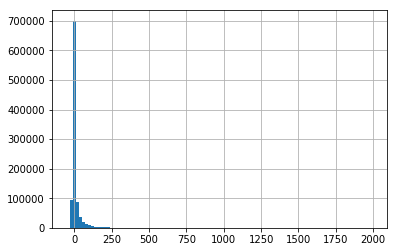

In [78]:
sample_flight_data_frame['DEPARTURE_DELAY'].hist(bins=100)

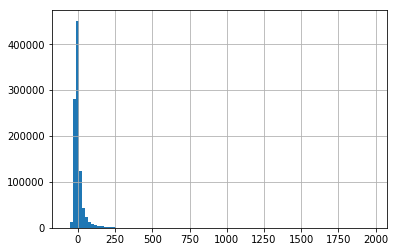

In [79]:
sample_flight_data_frame['ARRIVAL_DELAY'].hist(bins=100)

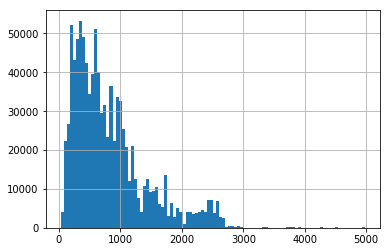

In [80]:
sample_flight_data_frame['DISTANCE'].hist(bins=100)

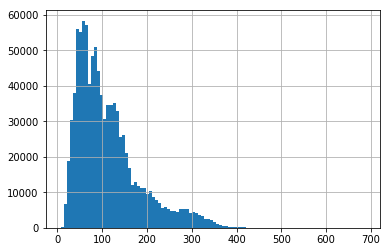

In [81]:
sample_flight_data_frame['AIR_TIME'].hist(bins=100)

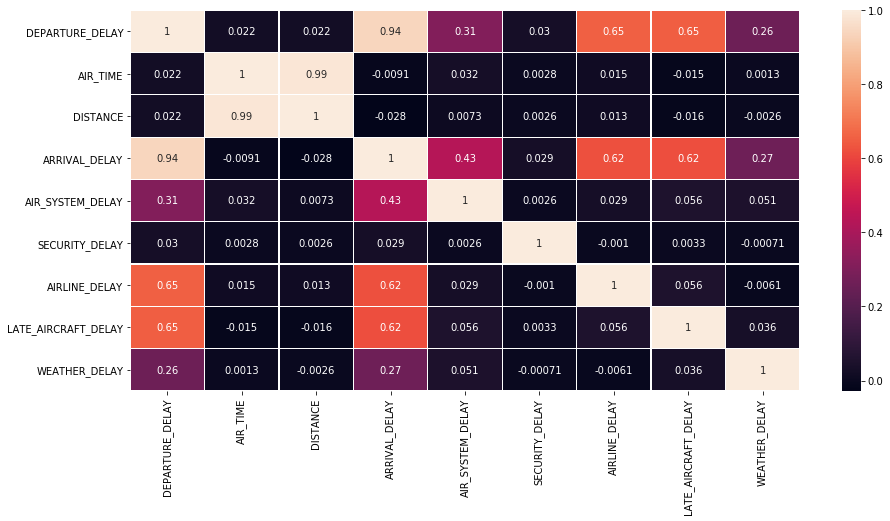

In [85]:
#corelation plot
pyplot.figure(figsize=(15,7))
seaborn.heatmap(sample_flight_data_frame[interesting_columns].corr(), annot=True, linewidths=0.1)

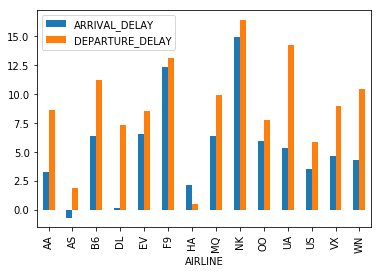

In [94]:
sample_flight_data_frame.pivot_table(values=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], index=['AIRLINE'],\
                       aggfunc=numpy.mean).plot(kind='bar')

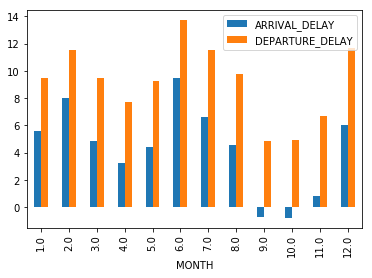

In [95]:
sample_flight_data_frame.pivot_table(values=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], index=['MONTH'],\
                       aggfunc=numpy.mean).plot(kind='bar')

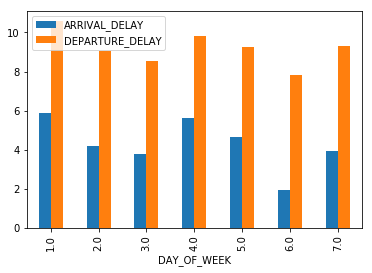

In [96]:
sample_flight_data_frame.pivot_table(values=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'], index=['DAY_OF_WEEK'],\
                       aggfunc=numpy.mean).plot(kind='bar')

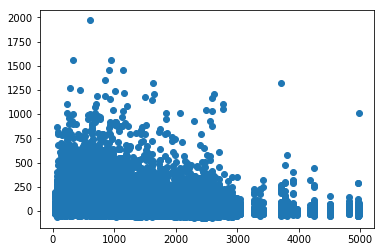

In [101]:
pyplot.scatter(sample_flight_data_frame['DISTANCE'], sample_flight_data_frame['ARRIVAL_DELAY'])

In [111]:
sample_flight_data_frame.pivot_table(values=['DEPARTURE_DELAY'], index=['ORIGIN_AIRPORT'],\
                       aggfunc=numpy.mean)[:10].sort_values(by='DEPARTURE_DELAY', ascending=False)

,DEPARTURE_DELAY
ORIGIN_AIRPORT,
10154,25.500000
10157,19.666667
10140,6.264493
10141,3.444444
10158,3.365854
10136,1.259259
10135,1.090909
10155,-0.500000
10165,-2.000000


In [113]:
sample_flight_data_frame.pivot_table(values=['ARRIVAL_DELAY'], index=['DESTINATION_AIRPORT'],\
                       aggfunc=numpy.mean)[:10].sort_values(by='ARRIVAL_DELAY', ascending=False)

,ARRIVAL_DELAY
DESTINATION_AIRPORT,
10157,10.875000
10136,6.677419
10146,6.181818
10135,2.785714
10158,-0.173077
10165,-1.000000
10141,-1.916667
10140,-1.943396
10155,-3.375000
